## Deep learning

We are exploring the fields of deep learning by looking at Keras which is a top-level neural network API extending some lower-level API's like Tensorflow. Because Keras is a top-level API it is easier to work with and therefore a good choice for inexperienced deep learning explorers, like ourselves.

Deep learning is a special branch of the Machine Learning tree where algorithms are inspired by the the neural structure of the biological human brain. The deep learning technique is widely used in situations where we need to teach computers to act as a human would do naturally.

To replicate the biological neural network present in the human brain, an artificial neural network is introduced. The artificial neural network is basically a computational model where the ANN structure is changing based on the flow of information in the model. Where the typical procedure in Machine Learning would be (1) input, (2) feature extraction, (3) classification and (4) output, in deep learning the feature extraction and classification procedure is combined in the same step.

### Backpropagation

The concept of doing a "backward propagation of errors" is actually an algorithm within the supervised learning domain. The algorithm is used for learning in artifical neural networks with gradient decent. The gradient of an error function is calculated in relation to the neural network weights.

A well known example that explains the concept of gradient decent very well is as follows: 

<i>Suppose you are at the top of a mountain, and you have to reach a lake which is at the lowest point of the mountain. A twist is that you are blindfolded and you have zero visibility to see where you are headed. So, what approach will you take to reach the lake? The best way is to check the ground near you and observe where the land tends to descend. This will give an idea in what direction you should take your first step. If you follow the descending path, it is very likely you would reach the lake. Inspiration source: https://www.analyticsvidhya.com/blog/2017/03/introduction-to-gradient-descent-algorithm-along-its-variants/</i>

## Deep learning on the Breast Cancer Wisconsin Data Set

In the following section we will explore Breast Cancer Wisconsin Data Set with a deep learning approach. We will predict whether the cancer is benign or malignant.

First we need to prepare our data.

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
data = pd.read_csv('input/data/data.csv')

# Delete the unnamed data col
del data['Unnamed: 32']

# Locate the data we want to use
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Encode categorical data
from sklearn.preprocessing import LabelEncoder
le_X_1 = LabelEncoder()
y = le_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Display the data
data.head()


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

            ...             radius_worst  texture_worst  perimeter_worst  \
0           ...                    25.38          17.33           184.60   
1           ...                    24.99          23.41           158.80   
2           ...                    23.57          25.53           152.50   
3           ...                    14.91          26.50            98.87   
4           ...                    22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 32 columns]

With our data well prepared we now need to import the Keras package an specify an artificial neural network.

In [103]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

ann = Sequential()

We now need to add the input layer and the first hidden layer. We need to add dropout to the ANN in order to prevent overfitting.

In [104]:
ann.add(Dense(16, kernel_initializer='uniform', activation='relu', input_dim=30))
ann.add(Dropout(0.1))

The last parameter of the Dense function represents the input dimensions of the data set (the number og cols). The first parameter represents the output dimensions (the number of outputs fed to the next layer).
The activation parameter represents the activation function which in our case is ReLU. The kernel_initializer parameter is determening the way in which the weights is provided to the artificial neural network. 

The ReLU function is f(x)=max(0,x). The ReLU function is used to speed up the training because the gradient computation is very simple. Depending on the sign of "x" ReLU wil pass either 0 or 1. Also any negative values will be set to 0, and therefore all the positive values are processed more quickly as the training goes on. By using the ReLU function we should be aware og so called "dead neurons".
<i>Inspiration source: https://stats.stackexchange.com/questions/226923/why-do-we-use-relu-in-neural-networks-and-how-do-we-use-it</i>

We will now add a second hidden layer and an output layer. 

In [105]:
# Second hidden layer
ann.add(Dense(16, kernel_initializer='uniform', activation='relu'))
ann.add(Dropout(0.1))

# Output layer
ann.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

Notice that we are using a different activation function for the output layer. We are also setting the output dimension to 1 as we only want one output from the final layer. The Sigmoid function is used when we in some cases have to deal with classification problems with results of two different types.

We now want to compile the artificial neural network.

In [106]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

The optimizer for our ANN is "adam" for Gradient Descent and the loss parameter represents with loss function we want to use.
Crossentropy measures the performance of the classifier where the output is a probability score (a number between 0 or 1).
<i>Inspiration source: https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html</i>

In the following code section we will try to fit the neural netowrk to the training set.

In [107]:
ann.fit(X_train, y_train, batch_size=100, epochs=130)

Epoch 1/130
398/398 [==============================] - 0s 1ms/step - loss: 0.6925 - acc: 0.7035
Epoch 2/130
398/398 [==============================] - 0s 16us/step - loss: 0.6911 - acc: 0.7136
Epoch 3/130
398/398 [==============================] - 0s 15us/step - loss: 0.6893 - acc: 0.7563
Epoch 4/130
398/398 [==============================] - 0s 14us/step - loss: 0.6868 - acc: 0.8040
Epoch 5/130
398/398 [==============================] - 0s 16us/step - loss: 0.6833 - acc: 0.8719
Epoch 6/130
398/398 [==============================] - 0s 19us/step - loss: 0.6785 - acc: 0.8995
Epoch 7/130
398/398 [==============================] - 0s 21us/step - loss: 0.6722 - acc: 0.9121
Epoch 8/130
398/398 [==============================] - 0s 20us/step - loss: 0.6638 - acc: 0.9322
Epoch 9/130
398/398 [==============================] - 0s 20us/step - loss: 0.6538 - acc: 0.9422
Epoch 10/130
398/398 [==============================] - 0s 20us/step - loss: 0.6404 - acc: 0.9447
Epoch 11/130
398/398 [========

Now that the data is fitted to the ANN we can go on and predict the results from the test set and calculate the accuracy score.

In [112]:
from sklearn.metrics import accuracy_score

y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

ac = accuracy_score(y_test, y_pred)
print('Accuracy =', ac*100)


Accuracy = 96.49122807017544


Further more we can produce a heatmap showing how well the training went.

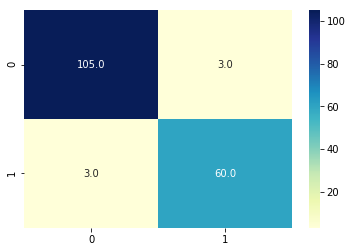

In [116]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm,annot=True,cmap="YlGnBu", fmt='.1f')
plt.savefig('deeplearningHeatmap.png')

We can verify the accuracy score by calculating it manually using the information from the confusion matrix.

In [111]:
total_no_of_values = 171;
TP = cm[0][0]
TN = cm[1][1]

ac2 = (((TP+TN)/total_no_of_values)*100)
print('Accuracy =', ac2)

Accuracy = 96.49122807017544


From the confusion matrix we see that we only have 3 false-positives and 3 false-negatives out of a sample size of 171 which leads to relatively high accuracy score. So based on the breast cancer data set our machine is now able to predict if a patients cancer is benign or malignant.